In [1]:
import yt
import unyt
# import yt_idv

import pynbody as pnb
import XIGrM.gas_properties as g_p

import matplotlib.pyplot as plt
import numpy as np
import pprint

# from numba import njit

# Load particle information in snapshot with yt

In [55]:
snap_dict = {
    # 'Hyenas-C L1 Halo 3224 (Mine)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/halo_3224_v3/snapshot_115.hdf5',
    # },
    # 'Hyenas-C L1 (OG)':{
    #     # 'snap_file':'/scratch/b/babul/aspadawe/snapshots/Hyenasc_L1_zooms/halo_3224/snap_halo_3224_151.hdf5',
    #     'snap_file':'/scratch/b/babul/wcui/HYENAS/Level1/halo_3224/snap_halo_3224_115.hdf5',
    # },
    # 'Hyenas L0 Halo 3224 (OG)':{
    #     'snap_file':'/scratch/b/babul/wcui/HYENAS/Level0/halo_3224/snap_halo_3224_151.hdf5',
    # },
    # 'Hyenas-C Ref L0 Halo 3224 (Simba-C L0 Calibration, Fred)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L0_Calibration/halo_3224/snapshot_151.hdf5',
    # },
    # "Hyenas-C Ref L0 Halo 3224 (Simba-C L0 Calibration, Doug)":{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L0_Calibration/halo_3224_rennehan/snapshot_151.hdf5',
    # },
    # 'Hyenas-C Ref L0 Halo 3224 (Simba-C L1 Calibration, Fred)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224/snapshot_151.hdf5',
    # },
    'Hyenas-C Ref L0 Halo 3224 (Simba-C L1 Calibration, Fred, Good)':{
        'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/snapshot_151.hdf5',
        'code':'Simba-C',
    },
    # 'Hyenas Halo 266 (FT_snap_halo_266_203)':{
    #     'snap_file':'/scratch/b/babul/fjenning/TEST_XRAY_BUBBLE_PART_TEMPS_AUG2025/FT_snap_halo_266_203.hdf5',
    # },
    # 'Hyenas Halo 488 (FT_snap_halo_488_203)':{
    #     'snap_file':'/scratch/b/babul/fjenning/TEST_XRAY_BUBBLE_PART_TEMPS_AUG2025/FT_snap_halo_488_203.hdf5',
    # },
    # 'Hyenas L1 Halo 252 (FT2Myr_snap_halo_252_600)':{
    #     'snap_file':'/scratch/b/babul/fjenning/xray_bubbles/PAPER2_Level1_zoom_252/snaps/FT2Myr_snap_halo_252_600.hdf5',
    # },
    # 'Hyenas-C L0 Halo 3224 (Spencer run01)':{
    #     'snap_file':'/scratch/b/babul/stlock/snapshots/HyenasC/L0/halo_3224_finished_runs/BAL_variations/run01/snapshot_151.hdf5',
    # },
    # 'Hyenas-C L0 Halo 3224 (Spencer run05)':{
    #     'snap_file':'/scratch/b/babul/stlock/snapshots/HyenasC/L0/halo_3224_finished_runs/BAL_variations/run05/snapshot_151.hdf5',
    # },
    # 'Hyenas-C L0 Halo 3224 (Spencer run10)':{
    #     'snap_file':'/scratch/b/babul/stlock/snapshots/HyenasC/L0/halo_3224_finished_runs/BAL_variations/run10/snapshot_151.hdf5',
    # },
    # 'Hyenas-C Smag L0 Halo 3224':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/halo_3224_smag/snapshot_151.hdf5',
    # },
    # 'Hyenas-C Grad L0 Halo 3224':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/halo_3224_grad/snapshot_151.hdf5',
    # },
    # 'Hyenas L1 Halo 3224 (OG)':{
    #     'snap_file':'/scratch/b/babul/wcui/HYENAS/Level1/halo_3224/snap_halo_3224_151.hdf5',
    # },
    # 'Hyenas-C Ref L1 Halo 3224':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/HyenasC/L1/halo_3224_v3/snapshot_151.hdf5',
    # },
    # 'Hyenas-C Smag L1 Halo 3224':{
    #     'snap_file':'/project/b/babul/aspadawe/snapshots/HyenasC/L1/halo_3224_smag/snapshot_151.hdf5',
    # },
    # 'Hyenas-C Grad L1 Halo 3224':{
    #     'snap_file':'/project/b/babul/aspadawe/snapshots/HyenasC/L1/halo_3224_grad/snapshot_151.hdf5',
    # },
    # 'Simba-C N128L12.5 (Renier)':{
    #     'snap_file':'/project/b/babul/renierht/Kobayashi_N128L12/snapshot_151.hdf5',
    # },
    # 'Simba-C N128L12.5 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N128L12.5/snapshot_151.hdf5',
    # },
    # 'Simba-C Smag N128L12.5 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N128L12.5_smag/snapshot_151.hdf5',
    # },
    # 'Simba-C Grad N128L12.5 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N128L12.5_grad/snapshot_151.hdf5',
    # },
    # 'Simba-C N256L25 (Renier Project)':{
    #     'snap_file':'/project/b/babul/renierht/Kobayashi_Dust_N256L25/snapshot_151.hdf5',
    # },
    # 'Simba-C N256L25 (Renier Scratch)':{
    #     'snap_file':'/scratch/b/babul/renierht/output_directory/Kobayashi_N256L25/snapshot_151.hdf5',
    # },
    # 'Simba-C N256L25 (Mine)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N256L25/snapshot_151.hdf5',
    # },
    # 'Simba-C N512L50 (Renier)':{
    #     'snap_file':'/scratch/b/babul/renierht/output_directory/Kobayashi_N512L50/snapshot_151.hdf5',
    # },
    # 'Simba-C N512L50 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N512L50/snapshot_151.hdf5',
    # },
    # 'Simba-C Smag N512L50 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N512L50_smag/snapshot_107.hdf5',
    # },
    # 'Simba-C Grad N512L50 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/SimbaC/N512L50_grad/snapshot_107.hdf5',
    # },
    # 'Simba N512L50 (Aviv)':{
    #     'snap_file':'/scratch/b/babul/aspadawe/snapshots/Simba/N512L50/snapshot_107.hdf5',
    # },
}

In [56]:
for snap_name, items in snap_dict.items():
    print(snap_name)
    items['yt'] = {
        'snap':yt.load(items['snap_file']),
        'particle_properties':{},
    }
    items['pnb'] = {
        'snap':pnb.load(items['snap_file']),
        'particle_properties':{},
    }
    items['pnb']['snap'].set_units_system(velocity='km a**0.5 s**-1', distance='kpc a h**-1', mass='1e10 Msol h**-1')
    items['pnb']['snap'].physical_units()
    items['pnb']['snap'].gas['u'] /= pnb.array.SimArray(items['pnb']['snap'].properties['a'], units='1')


    ## Metal indices
    if items['code'].lower() == 'simba':
        # Simba
        metals_idx = {'Z':0, 'He': 1, 'C': 2, 'N': 3, 'O': 4, 'Ne': 5, 'Mg': 6, 'Si': 7, 'S': 8, 'Ca': 9, 'Fe': 10}
        metals_idx_xigrm = {'H':0, 'He': 1, 'C': 2, 'N': 3, 'O': 4, 'Ne': 5, 'Mg': 6, 'Si': 7, 'S': 8, 'Ca': 9, 'Fe': 10}
        elems = ['H', 'He', 'C', 'N', 'O', 'Ne', 'Mg', 'Si', 'S', 'Ca', 'Fe']
    elif items['code'].lower() == 'simba-c':
        # Simba-C
        metals_idx = {'Z':0, 'H':1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mg': 12, 'Al':13,
                      'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19,'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24,
                      'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30}
        metals_idx_xigrm = {'H':0, 'He': 1, 'Li': 2, 'Be': 3, 'B': 4, 'C': 5, 'N': 6, 'O': 7, 'F': 8, 'Ne': 9, 'Na': 10, 'Mg': 11, 
                            'Al':12, 'Si': 13, 'P': 14, 'S': 15, 'Cl': 16, 'Ar': 17, 'K': 18,'Ca': 19, 'Sc': 20, 'Ti': 21, 'V': 22, 'Cr': 23,
                          'Mn': 24, 'Fe': 25, 'Co': 26, 'Ni': 27, 'Cu': 28, 'Zn': 29}
        elems=['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si',
               'P', 'S', 'Cl', 'Ar', 'K','Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn']#, 'Ga', 'Ge']\n",
    else:
        raise SystemExit('Code is not Simba or Simba-C')

    # Hydrogen mass fraction
    if items['code'].lower() == 'simba':
        items['pnb']['snap'].gas['X_H'] = 1-items['pnb']['snap'].gas['metals'][:,metals_idx['Z']]-items['pnb']['snap'].gas['metals'][:,metals_idx['He']]
    elif items['code'].lower() == 'simba-c':
        items['pnb']['snap'].gas['X_H'] = items['pnb']['snap'].gas['metals'][:,metals_idx['H']]
    
    items['pnb']['snap'].gas['nh'] = g_p.nh(items['pnb']['snap'])
    # print(items['pnb']['snap'].gas['ElectronAbundance'].units)
    items['pnb']['snap'].gas['ElectronAbundance'].units = '1'
    # print(items['pnb']['snap'].gas['ElectronAbundance'].units)
    items['pnb']['snap'].gas['T'] = g_p.temp(items['pnb']['snap']) # From internal energy to temperature

yt : [INFO     ] 2025-08-01 15:46:07,758 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-01 15:46:07,767 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-08-01 15:46:07,768 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-01 15:46:07,853 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-08-01 15:46:07,853 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-01 15:46:07,854 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-01 15:46:07,854 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-01 15:46:07,855 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-01 15:46:07,855 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-08-01 15:46:07,855 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-01 15:46:07,856 

Hyenas-C Ref L0 Halo 3224 (Simba-C L1 Calibration, Fred, Good)


## Information

In [57]:
for snap_name, items in snap_dict.items():
    items['yt']['snap_info'] = {
        'z':items['yt']['snap'].current_redshift,
        'field_list':items['yt']['snap'].field_list,
        'derived_field_list':items['yt']['snap'].derived_field_list,
        'domain_width':items['yt']['snap'].domain_width.in_units('Mpc/h'),
        'particle_types':items['yt']['snap'].particle_types,
        'particle_type_counts':items['yt']['snap'].particle_type_counts,
    }
    items['pnb']['snap_info'] = {
        'z':items['pnb']['snap'].properties['Redshift'],
        'properties':items['pnb']['snap'].properties,
        'loadable_keys':items['pnb']['snap'].loadable_keys(),
        'gas_loadable_keys':items['pnb']['snap'].gas.loadable_keys(),
        'dm_loadable_keys':items['pnb']['snap'].dm.loadable_keys(),
        'star_loadable_keys':items['pnb']['snap'].star.loadable_keys(),
        'bh_loadable_keys':items['pnb']['snap'].bh.loadable_keys(),
        'particle_types':items['pnb']['snap'].families(),
        # 'particle_type_counts':{
        #     family: for family in items['pnb']['snap'].families()
        # },
    }

yt : [INFO     ] 2025-08-01 15:46:11,828 Allocating for 7.6e+06 particles
Loading particle index: 100%|██████████| 10/10 [00:00<00:00, 3187.16it/s]


In [58]:
snap_dict

{'Hyenas-C Ref L0 Halo 3224 (Simba-C L1 Calibration, Fred, Good)': {'snap_file': '/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/snapshot_151.hdf5',
  'code': 'Simba-C',
  'yt': {'snap': GizmoDataset: /scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/snapshot_151.hdf5,
   'particle_properties': {},
   'snap_info': {'z': np.float64(4.440892098500626e-16),
    'field_list': [('PartType0', 'AGS-Softening'),
     ('PartType0', 'AccKey'),
     ('PartType0', 'ContaminationCount'),
     ('PartType0', 'Coordinates'),
     ('PartType0', 'DelayTime'),
     ('PartType0', 'Density'),
     ('PartType0', 'Dust_Masses'),
     ('PartType0', 'Dust_Metallicity'),
     ('PartType0', 'ElectronAbundance'),
     ('PartType0', 'FractionH2'),
     ('PartType0', 'GrackleHI'),
     ('PartType0', 'GrackleHII'),
     ('PartType0', 'GrackleHM'),
     ('PartType0', 'GrackleHeI'),
     ('PartType0', 'GrackleHeII'),
     ('PartType0', 'Grack

## Code Units

### yt

In [41]:
print(snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].units)

In [17]:
[unit for unit in dir(snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].units) if unit.startswith('code')]

['code_density',
 'code_length',
 'code_magnetic',
 'code_mass',
 'code_metallicity',
 'code_pressure',
 'code_specific_energy',
 'code_temperature',
 'code_time',
 'code_velocity']

In [18]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].length_unit.in_units('kpc*a/h')

unyt_quantity(1., 'a*kpc/h')

In [19]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].mass_unit.in_units('Msun/h')

unyt_quantity(1.e+10, 'Msun/h')

In [20]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].time_unit.in_units('Gyr/h')

unyt_quantity(0.97779222, 'Gyr/h')

In [21]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].velocity_unit.in_units('km*a/s')

unyt_quantity(1., 'a*km/s')

In [22]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].specific_energy_unit

unyt_quantity(1, 'km**2/s**2')

### pynbody

## Check random things

In [23]:
snap_dict[list(snap_dict.keys())[1]]['pnb']['snap'].gas['AGS-Softening']#.in_units('keV g**-1')

/project/b/babul/aspadawe/pyenvs/ondemand/lib/python3.13/site-packages/pynbody/snapshot/gadgethdf.py:472: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


SimArray([467.81946 , 564.45526 , 549.6823  , ...,  21.815842,  20.760212,
           26.436193], shape=(2308756,), dtype=float32)

In [24]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].all_data()['PartType0', 'AGS-Softening']

unyt_array([467.81945801, 564.45526123, 549.68231201, ...,  21.81584167,
        20.76021194,  26.43619347], shape=(2308756,), units='(dimensionless)')

In [25]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].all_data()['PartType0', 'smoothing_length']

unyt_array([467.81945801, 564.45526123, 549.68231201, ...,  21.81584167,
        20.76021194,  26.43619347], shape=(2308756,), units='code_length')

In [26]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].all_data()['gas', 'smoothing_length'].in_units('code_length')

unyt_array([467.81945801, 564.45526123, 549.68231201, ...,  21.81584167,
        20.76021194,  26.43619347], shape=(2308756,), units='code_length')

In [28]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].all_data()['gas', 'smoothing_length'].in_units('kpccm/h')

unyt_array([467.81945801, 564.45526123, 549.68231201, ...,  21.81584167,
        20.76021194,  26.43619347], shape=(2308756,), units='kpccm/h')

In [29]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].all_data()['PartType5', 'BH_Mass']

unyt_array([2.22458275e-05, 9.99999997e-07, 2.81280177e-06, 2.75899488e-02,
       9.99999997e-07, 1.00337513e-06, 9.22751555e-04, 2.00049203e-06,
       1.76696014e-02, 6.43501699e-06, 1.00187788e-06, 1.85363206e-06,
       4.17139791e-02, 2.12240848e-03, 2.60474905e-02, 5.97326725e-05,
       2.98659201e-03, 1.96308361e-06, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.80114471e-03, 9.99999997e-07, 9.99999997e-07,
       1.10253859e-06, 1.24565190e-06, 3.01068719e-03, 9.99999997e-07,
       4.90119828e-06, 3.03642848e-03, 3.77382798e-06, 9.99999997e-07,
       9.99999997e-07, 6.03041644e-06, 9.99999997e-07, 9.99999997e-07,
       9.99999997e-07, 9.99999997e-07, 5.89063950e-03, 9.99999997e-07,
       5.34257606e-06, 1.01654734e-06, 1.00134764e-06, 9.99999997e-07,
       4.75868164e-03, 3.30737612e-06, 1.00020259e-06, 9.99999997e-07,
       3.66625022e-06, 9.99999997e-07, 1.00117984e-06, 2.07170342e-05,
       1.20967641e-04, 3.00477986e-04, 1.79642439e-03, 9.99999997e-07,
 

In [30]:
snap_dict[list(snap_dict.keys())[1]]['yt']['snap'].all_data()['PartType5', 'BH_Mass'].in_units('Msun')*0.6e-10

unyt_array([1.96286713e-05, 8.82352939e-07, 2.48188391e-06, 2.43440725e-02,
       8.82352939e-07, 8.85330999e-07, 8.14192548e-04, 1.76514003e-06,
       1.55908247e-02, 5.67795616e-06, 8.84009891e-07, 1.63555770e-06,
       3.68064521e-02, 1.87271336e-03, 2.29830799e-02, 5.27052993e-05,
       2.63522824e-03, 1.73213259e-06, 8.82352939e-07, 8.82352939e-07,
       8.82352939e-07, 8.64806886e-03, 8.82352939e-07, 8.82352939e-07,
       9.72828168e-07, 1.09910462e-06, 2.65648869e-03, 8.82352939e-07,
       4.32458672e-06, 2.67920160e-03, 3.32984822e-06, 8.82352939e-07,
       8.82352939e-07, 5.32095569e-06, 8.82352939e-07, 8.82352939e-07,
       8.82352939e-07, 8.82352939e-07, 5.19762309e-03, 8.82352939e-07,
       4.71403770e-06, 8.96953539e-07, 8.83542036e-07, 8.82352939e-07,
       4.19883674e-03, 2.91827305e-06, 8.82531695e-07, 8.82352939e-07,
       3.23492667e-06, 8.82352939e-07, 8.83393976e-07, 1.82797361e-05,
       1.06736154e-04, 2.65127635e-04, 1.58508034e-03, 8.82352939e-07,
 

# Get particle properties of interest

In [63]:
properties = {
    'all_x_position':{
        'yt':{
            'name':['all', 'particle_position_x'],
            'units':'kpc',
        },
        'pnb':{
            'family':'all',
            'name':'pos',
            'index':0,
            'units':'kpc',
            'force_units':False,
            'factor':1,#1e-3,
        },
        'printable_name':r'$x_{\mathrm{all}}$',
        'unyts':'kpc',
        'remove_infs':True,
        'remove_zeros':False,
        'log':False,
    },
    'gas_x_position':{
        'yt':{
            'name':['gas', 'particle_position_x'],
            'units':'kpc',
        },
        'pnb':{
            'family':'gas',
            'name':'pos',
            'index':0,
            'units':'kpc',
            'force_units':False,
            'factor':1,#1e-3,
        },
        'printable_name':r'$x_{\mathrm{gas}}$',
        'unyts':'kpc',
        'remove_infs':True,
        'remove_zeros':False,
        'log':False,
    },
    'gas_y_position':{
        'yt':{
            'name':['gas', 'particle_position_y'],
            'units':'kpc',
        },
        'pnb':{
            'family':'gas',
            'name':'pos',
            'index':1,
            'units':'kpc',
            'force_units':False,
            'factor':1,#1e-3,
        },
        'printable_name':r'$y_{\mathrm{gas}}$',
        'unyts':'kpc',
        'remove_infs':True,
        'remove_zeros':False,
        'log':False,
    },
    'gas_z_position':{
        'yt':{
            'name':['gas', 'particle_position_z'],
            'units':'kpc',
        },
        'pnb':{
            'family':'gas',
            'name':'pos',
            'index':2,
            'units':'kpc',
            'force_units':False,
            'factor':1,#1e-3,
        },
        'printable_name':r'$z_{\mathrm{gas}}$',
        'unyts':'kpc',
        'remove_infs':True,
        'remove_zeros':False,
        'log':False,
    },
    'all_x_velocity':{
        'yt':{
            'name':['all', 'particle_velocity_x'],
            'units':'km/s',
        },
        'pnb':{
            'family':'all',
            'name':'vel',
            'index':0,
            'units':'km s**-1',
            'force_units':False,
            'factor':1,
        },
        'printable_name':r'$v_{\mathrm{x}}$',
        'unyts':'km/s',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'gas_density':{
        'yt':{
            'name':['gas', 'density'],
            'units':'Msun/kpc**3',
        },
        'pnb':{
            'family':'gas',
            'name':'rho',
            # 'index':2,
            'units':'Msol kpc**-3',
            'force_units':False,
            'factor':1,#1e9,
        },
        'printable_name':r'$\rho_{\mathrm{gas}}$',
        'unyts':'Msun/kpc**3',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'gas_internal_energy':{
        'yt':{
            'name':['PartType0', 'InternalEnergy'],
            'units':'km**2/s**2',
        },
        'pnb':{
            'family':'gas',
            'name':'u',
            # 'index':2,
            'units':'km**2 s**-2',
            'force_units':False,
            'factor':1,
        },
        'printable_name':r'$u_{\mathrm{gas}}$',
        'unyts':'km**2/s**2',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'gas_temperature':{
        'yt':{
            'name':['PartType0', 'Temperature'],
            'units':'K',
        },
        'pnb':{
            'family':'gas',
            'name':'temp',
            # 'index':2,
            'units':'K',
            'force_units':False,
            'factor':1,
        },
        'printable_name':r'$T_{\mathrm{gas}}$',
        'unyts':'K',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'gas_temperature2':{
        'yt':{
            'name':['gas', 'temperature'],
            'units':'K',
        },
        'pnb':{
            'family':'gas',
            'name':'T',
            # 'index':2,
            'units':'K',
            'force_units':False,
            'factor':1,
        },
        'printable_name':r'$T_{\mathrm{gas}}$',
        'unyts':'K',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'bh_dynamical_mass':{
        'yt':{
            'name':['PartType5', 'Masses'],
            'units':'Msun',
        },
        'pnb':{
            'family':'bh',
            'name':'mass',
            # 'index':2,
            'units':'Msol',
            'force_units':False,
            'factor':1,
        },
        'printable_name':r'$M_{\mathrm{BH,dyn}}$',
        'unyts':'Msun',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'bh_physical_mass':{
        'yt':{
            'name':['PartType5', 'BH_Mass'],
            'units':'code_mass', #'Msun'
        },
        'pnb':{
            'family':'bh',
            'name':'BH_Mass',
            # 'index':2,
            'units':'Msol',#'code_mass',
            'force_units':True,
            'factor':1,#5e10,
        },
        'printable_name':r'$M_{\mathrm{BH,phys}}$',
        'unyts':'Msun',
        'remove_infs':True,
        'remove_zeros':False,
        'log':True,
    },
    'bh_mdot':{
        'yt':{
            'name':['PartType5', 'BH_Mdot'],
            'units':'code_mass/code_time',#'Msun/yr',
        },
        'pnb':{
            'family':'bh',
            'name':'BH_Mdot',
            # 'index':2,
            'units':'Msol yr**-1', #'code_mass code_time**-1',
            'force_units':True,
            'factor':1,#1e1,
        },
        'printable_name':r'$\dot{M}_{\mathrm{BH}}$',
        'unyts':'Msun/yr',
        'remove_infs':True,
        'remove_zeros':True,
        'log':True,
    },
    
    # 'gas_temp':{
    #     'name':['gas', 'temperature'],
    #     'units':'K',
    #     'printable_name':r'$T_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'gas_velocity':{
    #     'name':['gas', 'velocity_magnitude'],
    #     'units':'km/s',
    #     'printable_name':r'$|v_{\mathrm{gas}}|$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'gas_density':{
    #     'name':['gas', 'density'],
    #     'units':'g/cm**3',
    #     'printable_name':r'$\rho_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'gas_entropy':{
    #     'name':['gas', 'entropy'],
    #     'units':'cm**2*keV',
    #     'printable_name':r'$K_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'gas_metallicity_nolog':{
    #     'name':['gas', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_metallicity_log':{
    #     'name':['gas', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'gas_fe_metallicity_nolog':{
    #     'name':['gas', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'gas_fe_metallicity_log':{
    #     'name':['gas', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'gas_sfr':{
    #     'name':['gas', 'star_formation_rate'],
    #     'units':'Msun/yr',
    #     'printable_name':r'$\mathrm{SFR_{gas}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'star_metallicity_nolog':{
    #     'name':['PartType4', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'star_metallicity_log':{
    #     'name':['PartType4', 'metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'star_fe_metallicity_nolog':{
    #     'name':['PartType4', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'star_fe_metallicity_log':{
    #     'name':['PartType4', 'Fe_metallicity'],
    #     'units':'',
    #     'printable_name':r'$Z_{\mathrm{Fe,star}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'star_formation_time':{
    #     'name':['PartType4', 'StellarFormationTime'],
    #     'units':'',
    #     'printable_name':r'Stellar Formation Time',
    #     'remove_infs':True,
    #     'remove_zeros':False,
    #     'log':False,
    # },
    # 'star_age':{
    #     'name':['PartType4', 'age'],
    #     'units':'Gyr',
    #     'printable_name':r'Stellar Age',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'star_creation_time':{
    #     'name':['PartType4', 'creation_time'],
    #     'units':'Gyr',
    #     'printable_name':r'Stellar Creation Time',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'parttype1_mass':{
    #     'name':['PartType1', 'Masses'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{PartType1}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'parttype2_mass':{
    #     'name':['PartType2', 'Masses'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{PartType2}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'parttype1_velocity':{
    #     'name':['PartType1', 'particle_velocity_magnitude'],
    #     'units':'km/s',
    #     'printable_name':r'$|v_{\mathrm{PartType1}}|$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'parttype2_velocity':{
    #     'name':['PartType2', 'particle_velocity_magnitude'],
    #     'units':'km/s',
    #     'printable_name':r'$|v_{\mathrm{PartType2}}|$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'bh_dynamical_mass':{
    #     'name':['PartType5', 'Masses'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{BH,dyn}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'bh_physical_mass':{
    #     'name':['PartType5', 'BH_Mass'],
    #     'units':'Msun/h',
    #     'printable_name':r'$M_{\mathrm{BH,phys}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
    # 'bh_mdot':{
    #     'name':['PartType5', 'BH_Mdot'],
    #     'units':'Msun/yr',
    #     'printable_name':r'$\dot{M}_{\mathrm{BH}}$',
    #     'remove_infs':True,
    #     'remove_zeros':True,
    #     'log':True,
    # },
}

ndex_below_min = 3

In [64]:
for snap_name, items in snap_dict.items():
    print(snap_name)
    print()

    ## yt
    print('yt:')
    yt_data = items['yt']['snap'].all_data()
    for prop, prop_info in properties.items():
        yt_info = prop_info['yt']
        print(f'{prop} {yt_info['units']}')
        vals = yt_data[*yt_info['name']]
        print(f'OG units: {vals.units}')
        items['yt']['particle_properties'][prop] = vals.in_units(yt_info['units'])
        # if prop_info['log']:
            # values_to_plot = np.log10(values_to_plot)
            # items['properties'][prop] = np.log10(items['properties'][prop])
        if prop_info['remove_infs']:
            items['yt']['particle_properties'][prop][items['yt']['particle_properties'][prop]==np.inf] = np.nan
        if prop_info['remove_zeros']:
            items['yt']['particle_properties'][prop][items['yt']['particle_properties'][prop]==0] = np.nan
        # if prop_info['log']:
        #     nzeros = np.count_nonzero(items['yt']['particle_properties'][prop]==0)
        #     zero_vals = [10**(np.log10(np.min(items['yt']['particle_properties'][prop][np.isfinite(items['yt']['particle_properties'][prop])]))-ndex_below_min)]*nzeros
        #     # if 'code' in yt_info['units']:
        #     zero_vals = unyt.unyt_array(zero_vals, yt_info['units'])
        #     # zero_vals = items['yt']['snap'].unyt_array(zero_vals, yt_info['units'])
        #     # zero_vals = np.array(zero_vals)
        #     items['yt']['particle_properties'][prop] = np.append(items['yt']['particle_properties'][prop], zero_vals)
        print('done')
    # print()


    print()
    
    ## pynbody
    print('pnb:')
    # all_data = items['yt']['snap'].all_data()
    pnb_data = {
        'all':items['pnb']['snap'],
        'gas':items['pnb']['snap'].gas,
        'stars':items['pnb']['snap'].stars,
        'dm':items['pnb']['snap'].dm,
        # 'dm2':items['pnb']['snap'].dm2,
        # 'dm3':items['pnb']['snap'].dm3,
        'bh':items['pnb']['snap'].bh,
    }
    for prop, prop_info in properties.items():
        pnb_info = prop_info['pnb']
        print(f'{prop} {pnb_info['units']}')
        vals = pnb_data[pnb_info['family']][pnb_info['name']]
        print(f'OG units: {vals.units}')
        if pnb_info['force_units']:
            vals = pnb.array.SimArray(vals, units=pnb_info['units'])
        else:
            vals = vals.in_units(pnb_info['units'])
        vals *= pnb_info['factor']
        # vals = pnb_data[pnb_info['family']][pnb_info['name']] * pnb_info['factor']
        # print(vals.units)
        if 'index' in pnb_info.keys():
            vals = vals[:,pnb_info['index']]
        items['pnb']['particle_properties'][prop] = vals
        # if prop_info['log']:
            # values_to_plot = np.log10(values_to_plot)
            # items['properties'][prop] = np.log10(items['properties'][prop])
        if prop_info['remove_infs']:
            items['pnb']['particle_properties'][prop][items['pnb']['particle_properties'][prop]==np.inf] = np.nan
        if prop_info['remove_zeros']:
            items['pnb']['particle_properties'][prop][items['pnb']['particle_properties'][prop]==0] = np.nan
        # if prop_info['log']:
        #     nzeros = np.count_nonzero(items['pnb']['particle_properties'][prop]==0)
        #     zero_vals = [10**(np.log10(np.min(items['pnb']['particle_properties'][prop][np.isfinite(items['pnb']['particle_properties'][prop])]))-ndex_below_min)]*nzeros
        #     # zero_vals = unyt.unyt_array(zero_vals, prop_info['unyts'])
        #     zero_vals = pnb.array.SimArray(zero_vals, pnb_info['units'])
        #     items['pnb']['particle_properties'][prop] = np.append(items['pnb']['particle_properties'][prop], zero_vals)
        print('done')
    print()
    print()
    # print()

Hyenas-C Ref L0 Halo 3224 (Simba-C L1 Calibration, Fred, Good)

yt:
all_x_position kpc
OG units: code_length
done
gas_x_position kpc
OG units: cm
done
gas_y_position kpc
OG units: cm
done
gas_z_position kpc
OG units: cm
done
all_x_velocity km/s
OG units: code_velocity
done
gas_density Msun/kpc**3
OG units: g/cm**3
done
gas_internal_energy km**2/s**2
OG units: code_specific_energy
done
gas_temperature K
OG units: K
done
gas_temperature2 K
OG units: K
done
bh_dynamical_mass Msun
OG units: code_mass
done
bh_physical_mass code_mass
OG units: code_mass
done
bh_mdot code_mass/code_time
OG units: code_mass/code_time
done

pnb:
all_x_position kpc
OG units: kpc
done
gas_x_position kpc
OG units: kpc
done
gas_y_position kpc
OG units: kpc
done
gas_z_position kpc
OG units: kpc
done
all_x_velocity km s**-1
OG units: km s**-1
done
gas_density Msol kpc**-3
OG units: Msol kpc**-3
done
gas_internal_energy km**2 s**-2
OG units: km**2 s**-2
done
gas_temperature K
OG units: K
done
gas_temperature2 K
OG uni

In [65]:
snap_dict

{'Hyenas-C Ref L0 Halo 3224 (Simba-C L1 Calibration, Fred, Good)': {'snap_file': '/scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/snapshot_151.hdf5',
  'code': 'Simba-C',
  'yt': {'snap': GizmoDataset: /scratch/b/babul/aspadawe/snapshots/HyenasC/L0/SimbaC_L1_Calibration/halo_3224_og_good/snapshot_151.hdf5,
   'particle_properties': {'all_x_position': unyt_array([139068.9453125 , 139066.23391544, 139045.10569853, ...,
           151542.17601103, 151652.67693015, 151489.01654412],
          shape=(7600159,), units='kpc'),
    'gas_x_position': unyt_array([139068.9453125 , 139066.23391544, 139045.10569853, ...,
           147465.16544118, 147106.8359375 , 147107.66314338],
          shape=(2384049,), units='kpc'),
    'gas_y_position': unyt_array([142731.39935662, 142724.77022059, 142717.46323529, ...,
           145899.75873162, 145664.98161765, 145790.64797794],
          shape=(2384049,), units='kpc'),
    'gas_z_position': unyt_array([139008.5363

# Plot properties

all_x_position


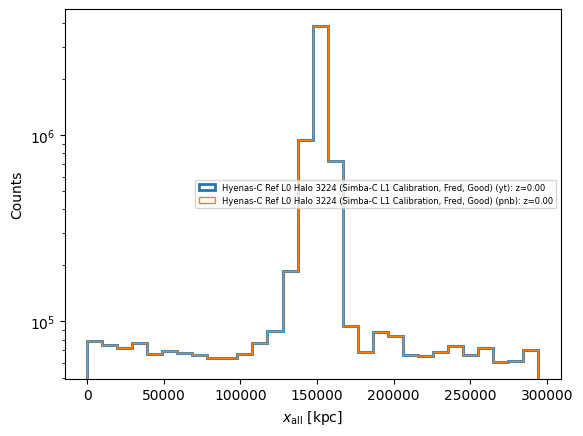


gas_x_position


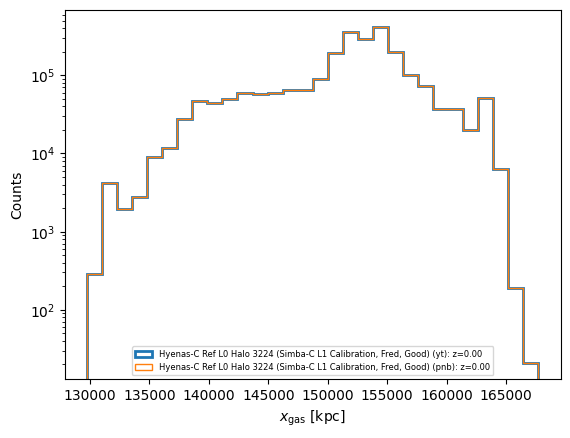


gas_y_position


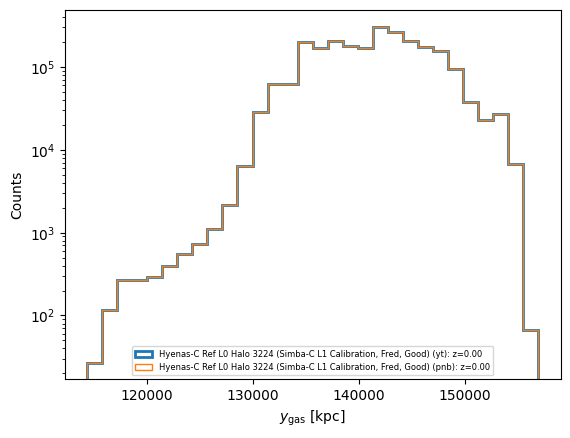


gas_z_position


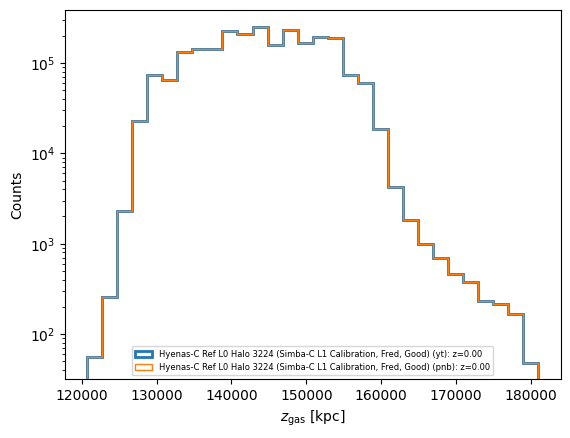


all_x_velocity


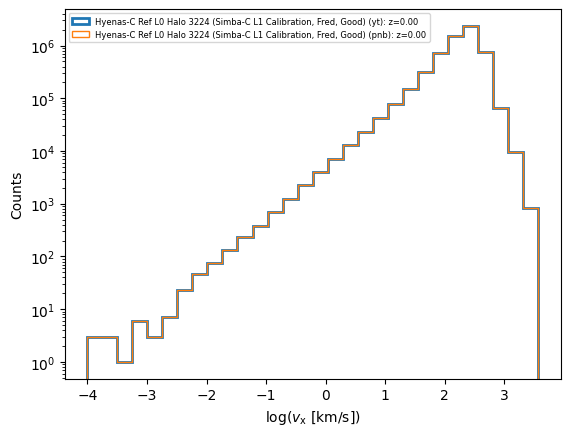


gas_density


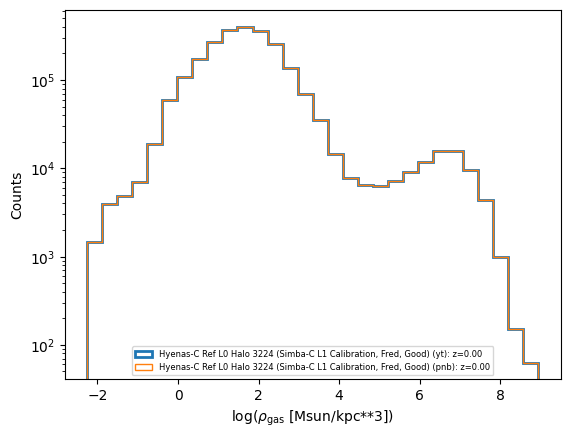


gas_internal_energy


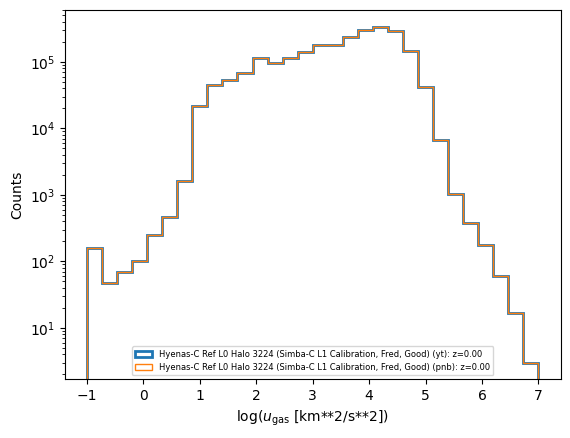


gas_temperature


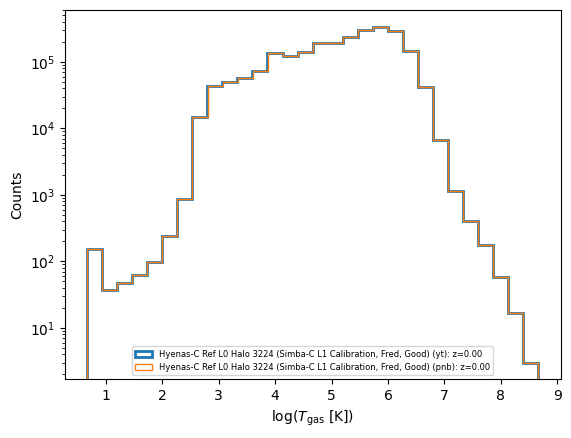


gas_temperature2


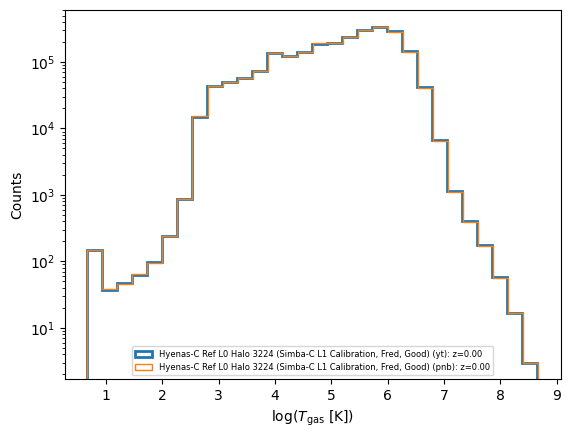


bh_dynamical_mass


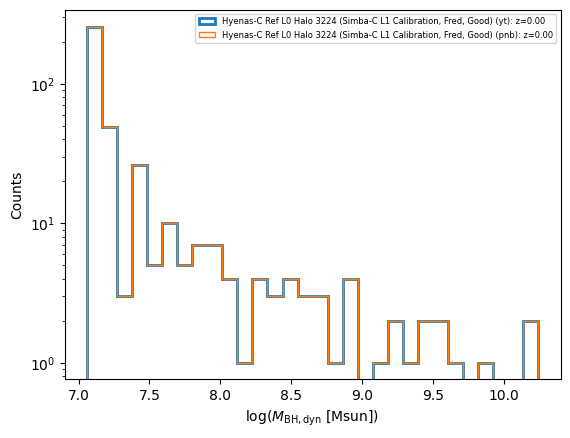


bh_physical_mass


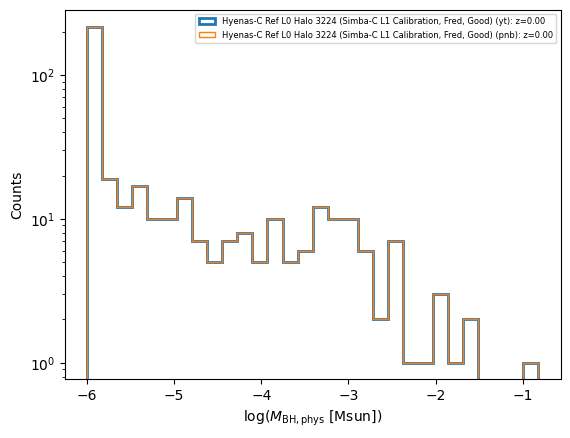


bh_mdot


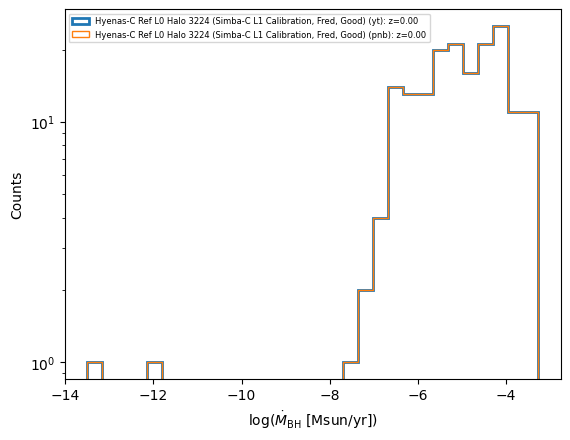

In [66]:
for prop, prop_info in properties.items():
    print(prop)
    lw = len(snap_dict.keys())*1 * 2
    for snap_name, items in snap_dict.items():
        for snap_type in ['yt', 'pnb']:
            values = items[snap_type]['particle_properties'][prop]
            values_to_plot = values
            if prop_info['log']:
                values_to_plot = np.log10(values_to_plot)
            plt.hist(values_to_plot, bins=30, log=True, histtype='step', ls='--', linewidth=lw,
                     label=f'{snap_name} ({snap_type}): z={items[snap_type]['snap_info']['z']:.2f}')
            lw -= 1*1
    # xlabel = rf'{prop_info['printable_name']} [{values.units}]'
    xlabel = rf'{prop_info['printable_name']} [{prop_info['unyts']}]'
    if prop_info['log']:
        xlabel = f'log({xlabel})'
    plt.xlabel(xlabel)
    plt.ylabel('Counts')
    plt.legend(fontsize=6)#, loc='upper left')
    plt.show()
    print()